####  Importing required Python Libraries

In [440]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt # for visualization

import seaborn as sns           # for visualization

from sklearn import preprocessing   # for machine learning
from sklearn.preprocessing import MinMaxScaler, StandardScaler 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# enable inline plots in the notebook
%matplotlib inline

#### Uploading data file 

In [441]:
df=pd.read_csv("Project2_Classification_HouseGrade_Data_Project.csv")
df.head(1)

,Id,Area(total),Trooms,Nbedrooms,Nbwashrooms,Twashrooms,roof,Roof(Area),Lawn(Area),Nfloors,API,ANB,Expected price,Grade
0,1,339,6,5,4,6,NO,0,76,2,79,6,3481,D


#### Understanding data

In [442]:
print(df.shape)
print(df.size)
print(df.info())


(3000, 14)
42000
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Id              3000 non-null   int64 
 1   Area(total)     3000 non-null   int64 
 2   Trooms          3000 non-null   int64 
 3   Nbedrooms       3000 non-null   int64 
 4   Nbwashrooms     3000 non-null   int64 
 5   Twashrooms      3000 non-null   int64 
 6   roof            3000 non-null   object
 7   Roof(Area)      3000 non-null   int64 
 8   Lawn(Area)      3000 non-null   int64 
 9   Nfloors         3000 non-null   int64 
 10  API             3000 non-null   int64 
 11  ANB             3000 non-null   int64 
 12  Expected price  3000 non-null   int64 
 13  Grade           3000 non-null   object
dtypes: int64(12), object(2)
memory usage: 328.2+ KB
None


#### Data preprocessing

In [443]:
# Descriptive statistics are very useful for initial exploration of the variables
# By default, only descriptives for the numerical variables are shown
df.describe()

,Id,Area(total),Trooms,Nbedrooms,Nbwashrooms,Twashrooms,Roof(Area),Lawn(Area),Nfloors,API,ANB,Expected price
count,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.00000,3000.000000
mean,1500.500000,325.117000,7.021667,5.023000,4.513667,6.010667,48.980667,95.609333,4.013333,70.190667,3.47900,3782.938333
std,866.169729,20.507742,1.421221,1.634838,1.715263,1.786136,48.746641,14.837388,1.621532,17.563460,1.69426,567.189995
min,1.000000,290.000000,5.000000,2.000000,1.000000,2.000000,0.000000,70.000000,1.000000,40.000000,1.00000,2504.000000
25%,750.750000,308.000000,6.000000,4.000000,3.000000,5.000000,0.000000,83.000000,3.000000,55.000000,2.00000,3354.000000
50%,1500.500000,325.000000,7.000000,5.000000,4.000000,6.000000,71.000000,96.000000,4.000000,70.000000,4.00000,3771.000000
75%,2250.250000,343.000000,8.000000,6.000000,6.000000,7.000000,96.000000,109.000000,5.000000,85.000000,5.00000,4208.000000
max,3000.000000,360.000000,9.000000,8.000000,8.000000,10.000000,120.000000,120.000000,7.000000,100.000000,6.00000,5216.000000


#### Checking the missing value

In [444]:
# This will give us the total number of missing values feature-wise
df.isnull().sum()

Id                0
Area(total)       0
Trooms            0
Nbedrooms         0
Nbwashrooms       0
Twashrooms        0
roof              0
Roof(Area)        0
Lawn(Area)        0
Nfloors           0
API               0
ANB               0
Expected price    0
Grade             0
dtype: int64

#### No null values are their in dataset

#### Separating catgeorical and continuous

In [445]:
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns
from tabulate import tabulate

In [446]:
def sep(df):
    categorical = []
    continuous = []
    
    for column in df.columns:
        if df[column].nunique() < 15:
            categorical.append(column)
            
        else:
            continuous.append(column)
                
    return categorical, continuous

categorical, continuous = sep(df)

table ={"Categorical":categorical, "Continuous":continuous}
print(tabulate(table, headers=["Categorical","continuous"]))

Categorical    continuous
-------------  --------------
Trooms         Id
Nbedrooms      Area(total)
Nbwashrooms    Roof(Area)
Twashrooms     Lawn(Area)
roof           API
Nfloors        Expected price
ANB
Grade


#### 1) Trooms (Univariate)

In [447]:
def info_of_cat(col): 
    print(f"Unique values in {col} are: {df[col].unique()}") # unique: returns the unique values in the col
    print(f"Mode of {col} is {df[col].mode()[0]}")  # mode: returns the mode of the column
    print(f"Number of missing values in {col} is {df[col].isnull().sum()}") # isnull().sum() counts the number of null in dataframe
    if df[col].isnull().sum() > 0:  # check if null values are present
        print(f"\nThere are null values in the {col} column")

In [448]:
info_of_cat("Trooms")

Unique values in Trooms are: [6 5 7 8 9]
Mode of Trooms is 9
Number of missing values in Trooms is 0


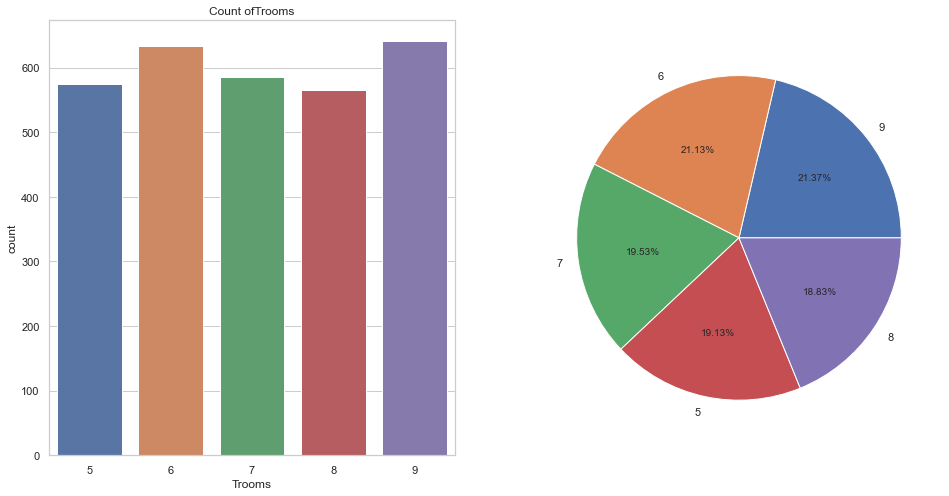

In [449]:
fig, ax=plt.subplots(1,2,figsize=(16,8))
ax[0].set_title("Count ofTrooms")
percentage=df["Trooms"].value_counts()
labels=list(df["Trooms"].value_counts().index)

sns.countplot(x=df["Trooms"], ax=ax[0])
plt.pie(percentage,labels=labels, autopct="%0.2f%%")

plt.show()

#### 21.37% of have 9 washrooms 

#### 2) Nbedrooms

In [450]:
def info_of_cat(col): 
    print(f"Unique values in {col} are: {df[col].unique()}") # unique: returns the unique values in the col
    print(f"Mode of {col} is {df[col].mode()[0]}")  # mode: returns the mode of the column
    print(f"Number of missing values in {col} is {df[col].isnull().sum()}") # isnull().sum() counts the number of null in dataframe
    if df[col].isnull().sum() > 0:  # check if null values are present
        print(f"\nThere are null values in the {col} column")

In [451]:
info_of_cat("Nbedrooms")

Unique values in Nbedrooms are: [5 4 7 8 6 3 2]
Mode of Nbedrooms is 4
Number of missing values in Nbedrooms is 0


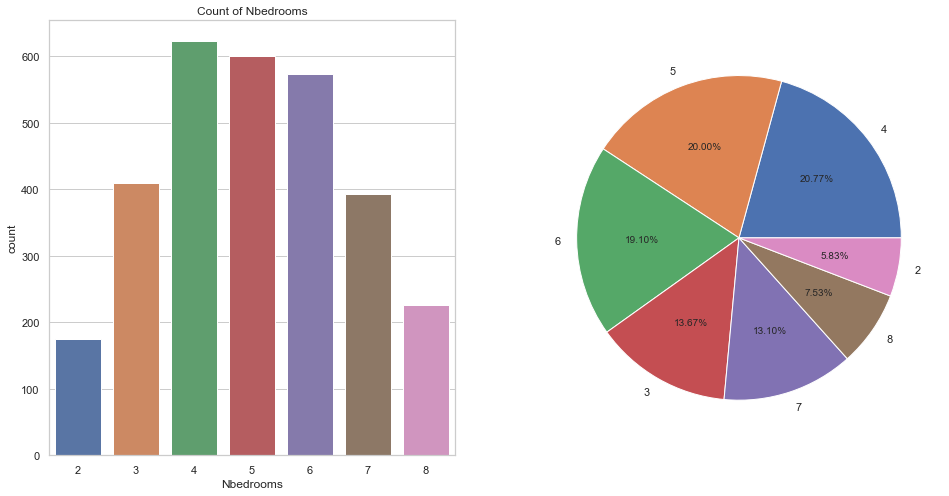

In [452]:
fig, ax=plt.subplots(1,2,figsize=(16,8))
ax[0].set_title("Count of Nbedrooms")
percentage=df["Nbedrooms"].value_counts()
labels=list(df["Nbedrooms"].value_counts().index)

sns.countplot(x=df["Nbedrooms"], ax=ax[0])
plt.pie(percentage,labels=labels, autopct="%0.2f%%")

plt.show()

#### 20.77% oh house have 4 bedrooms 

#### 3) Twashrooms

In [453]:
def info_of_cat(col): 
    print(f"Unique values in {col} are: {df[col].unique()}") # unique: returns the unique values in the col
    print(f"Mode of {col} is {df[col].mode()[0]}")  # mode: returns the mode of the column
    print(f"Number of missing values in {col} is {df[col].isnull().sum()}") # isnull().sum() counts the number of null in dataframe
    if df[col].isnull().sum() > 0:  # check if null values are present
        print(f"\nThere are null values in the {col} column")

In [454]:
info_of_cat("Twashrooms")

Unique values in Twashrooms are: [ 6  4  5  7  9  8  3  2 10]
Mode of Twashrooms is 5
Number of missing values in Twashrooms is 0


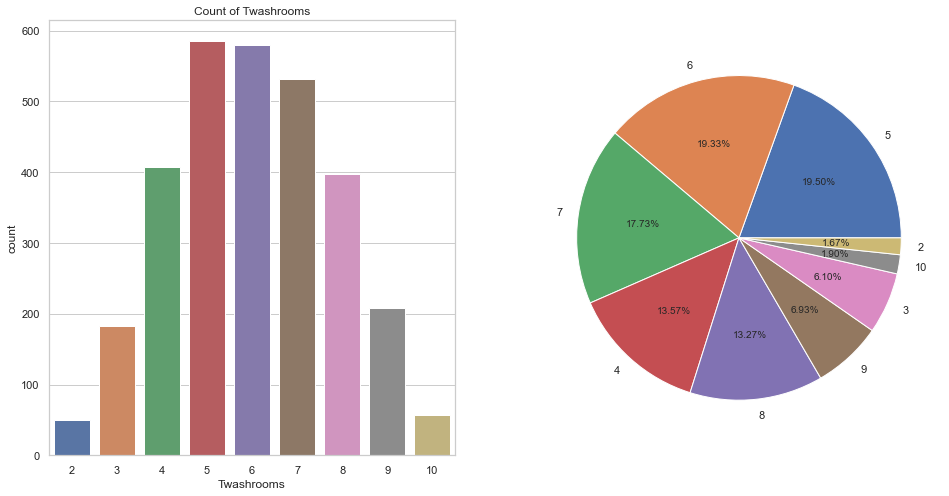

In [455]:
fig, ax=plt.subplots(1,2,figsize=(16,8))
ax[0].set_title("Count of Twashrooms")
percentage=df["Twashrooms"].value_counts()
labels=list(df["Twashrooms"].value_counts().index)

sns.countplot(x=df["Twashrooms"], ax=ax[0])
plt.pie(percentage,labels=labels, autopct="%0.2f%%")

plt.show()

#### 19.50% of house have 5 washrooms into it

#### Univariate analysis of Numerical valuyes

#### 1) Area(total)

In [456]:
def info_of_numerical(col):
    print(f"The mean of the {col} is {df[col].mean()}")
    print(f"The median of the {col} is {df[col].median()}")
    print(f"The mode of the {col} is {df[col].mode()[0]}")
    print(f"The standard deviation of the {col} is {df[col].std()}")
    print(f"Number of missing values in the {col} is {df[col].isnull().sum()}")

In [457]:
info_of_numerical("Area(total)")

The mean of the Area(total) is 325.117
The median of the Area(total) is 325.0
The mode of the Area(total) is 344
The standard deviation of the Area(total) is 20.50774244442138
Number of missing values in the Area(total) is 0


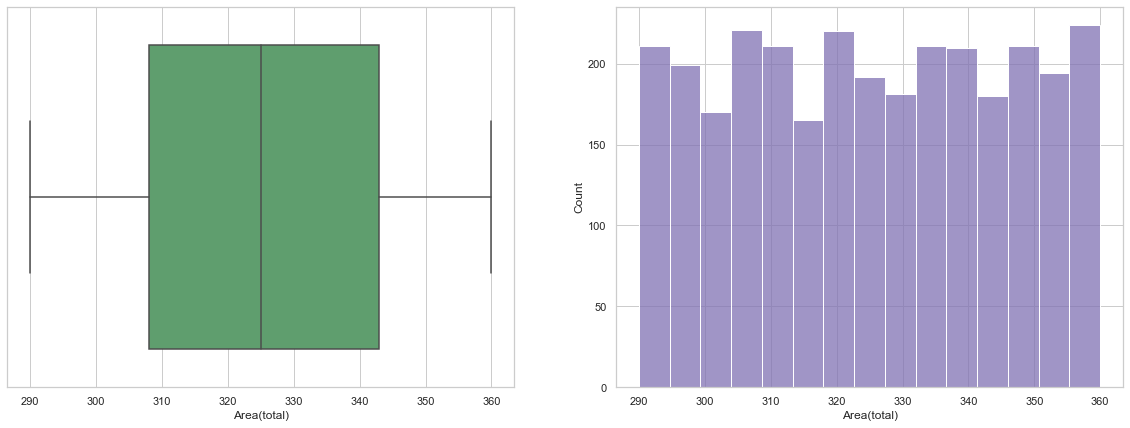

In [458]:
# Distribution of AMT_INCOME_TOTAL
fig, ax = plt.subplots(1, 2, figsize= (20, 7))               # Creating the space for the 2 images, first argument in subplots is rows and second is columns and the figure size
sns.histplot(x = df["Area(total)"], ax =ax[1], color = "m") # ax[1] means image will plot at the second space
sns.boxplot(x = df["Area(total)"], ax = ax[0], color = "g") # ax[0] means image will plot at the second space
plt.show()

#### Most of the house lies bwteen the range of 310 to 342 carpet area as in total

#### 2) Roof(Area)

In [459]:
info_of_numerical("Roof(Area)")

The mean of the Roof(Area) is 48.980666666666664
The median of the Roof(Area) is 71.0
The mode of the Roof(Area) is 0
The standard deviation of the Roof(Area) is 48.74664129867301
Number of missing values in the Roof(Area) is 0


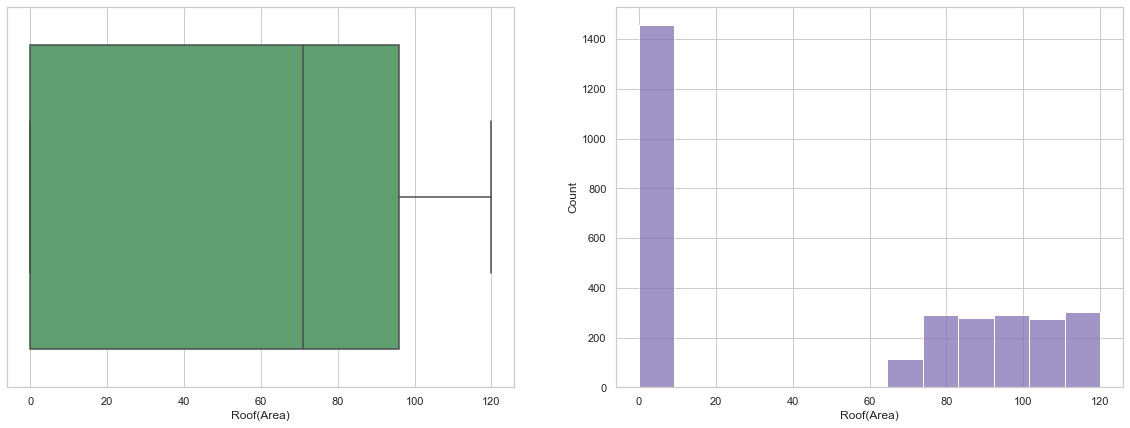

In [460]:
# Distribution of AMT_INCOME_TOTAL
fig, ax = plt.subplots(1, 2, figsize= (20, 7))               # Creating the space for the 2 images, first argument in subplots is rows and second is columns and the figure size
sns.histplot(x = df["Roof(Area)"], ax =ax[1], color = "m") # ax[1] means image will plot at the second space
sns.boxplot(x = df["Roof(Area)"], ax = ax[0], color = "g") # ax[0] means image will plot at the second space
plt.show()

#### 3) Lawn(Area)

In [461]:
info_of_numerical("Lawn(Area)")

The mean of the Lawn(Area) is 95.60933333333334
The median of the Lawn(Area) is 96.0
The mode of the Lawn(Area) is 101
The standard deviation of the Lawn(Area) is 14.83738843555081
Number of missing values in the Lawn(Area) is 0


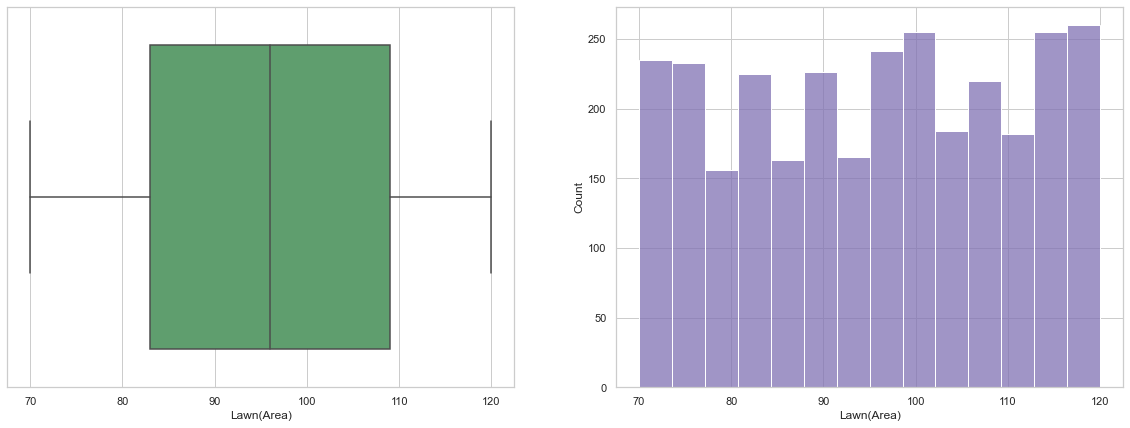

In [462]:
# Distribution of AMT_INCOME_TOTAL
fig, ax = plt.subplots(1, 2, figsize= (20, 7))               # Creating the space for the 2 images, first argument in subplots is rows and second is columns and the figure size
sns.histplot(x = df["Lawn(Area)"], ax =ax[1], color = "m") # ax[1] means image will plot at the second space
sns.boxplot(x = df["Lawn(Area)"], ax = ax[0], color = "g") # ax[0] means image will plot at the second space
plt.show()

#### Most of house range between the lawn(area) of 82 to 110 area 

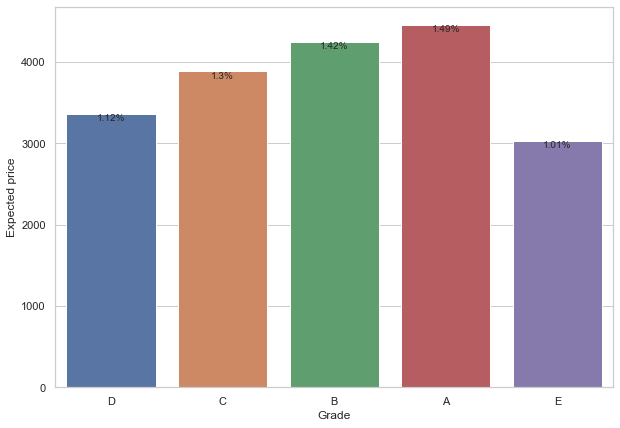

In [463]:
fig,ax= plt.subplots(figsize=(10,7))
sns.barplot(x=df['Grade'],y=df['Expected price'],ci=None,ax=ax)
#count=len(df['Area(total)'])

for bar in ax.patches:
    percentage = f'{round((bar.get_height()/count),2)}%'
    
    x=bar.get_x()+bar.get_width()/2
    y=bar.get_height()
    ax.annotate(percentage,(x,y),ha='center',va='top')
    
plt.show()

### If we look at the bar graph we have grade A as a more number of houses with expected price more than 4000

#### feature engineering

In [464]:
# Using Label Encoder technique to convert categorical column into numerical type

#label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
# Encode labels in column 'species'.
df['Grade_encode']= label_encoder.fit_transform(df['Grade'])
df['roof_encode']= label_encoder.fit_transform(df['roof'])
 
print("Grade of house_encode",df['Grade_encode'].unique())
print("Roof presence_encode",df['roof_encode'].unique())

Grade of house_encode [3 2 1 0 4]
Roof presence_encode [0 1]


In [467]:
house_df=df

#### correlation

In [468]:
house_df.corr()

,Id,Area(total),Trooms,Nbedrooms,Nbwashrooms,Twashrooms,Roof(Area),Lawn(Area),Nfloors,API,ANB,Expected price,Grade_encode,roof_encode
Id,1.000000,0.003186,0.003165,0.004814,0.003496,0.001092,0.013046,0.006309,-0.010939,-0.003739,-0.013219,0.009216,-0.006074,0.011059
Area(total),0.003186,1.000000,0.019041,0.031328,0.031819,0.038509,0.017029,-0.002118,0.016819,-0.000182,-0.010846,0.274507,-0.177332,0.014229
Trooms,0.003165,0.019041,1.000000,0.865878,0.827072,0.794870,0.026550,0.009557,0.862367,0.007502,0.007321,0.820170,-0.875145,0.025142
Nbedrooms,0.004814,0.031328,0.865878,1.000000,0.956578,0.919158,0.025073,0.000054,0.742132,0.002820,0.015403,0.715687,-0.865389,0.023058
Nbwashrooms,0.003496,0.031819,0.827072,0.956578,1.000000,0.960007,0.028832,0.006617,0.711936,0.011413,0.008475,0.683659,-0.847319,0.028549
Twashrooms,0.001092,0.038509,0.794870,0.919158,0.960007,1.000000,0.028763,0.008386,0.684966,0.012361,0.016492,0.654627,-0.819280,0.028212
Roof(Area),0.013046,0.017029,0.026550,0.025073,0.028832,0.028763,1.000000,-0.006831,0.013840,-0.006331,-0.015529,0.009346,-0.170259,0.976561
Lawn(Area),0.006309,-0.002118,0.009557,0.000054,0.006617,0.008386,-0.006831,1.000000,0.013771,0.011477,0.025751,0.011561,-0.051200,-0.004640
Nfloors,-0.010939,0.016819,0.862367,0.742132,0.711936,0.684966,0.013840,0.013771,1.000000,-0.002255,0.020614,0.714598,-0.787623,0.014985
API,-0.003739,-0.000182,0.007502,0.002820,0.011413,0.012361,-0.006331,0.011477,-0.002255,1.000000,-0.025694,0.016575,-0.099000,-0.007983


<AxesSubplot:>

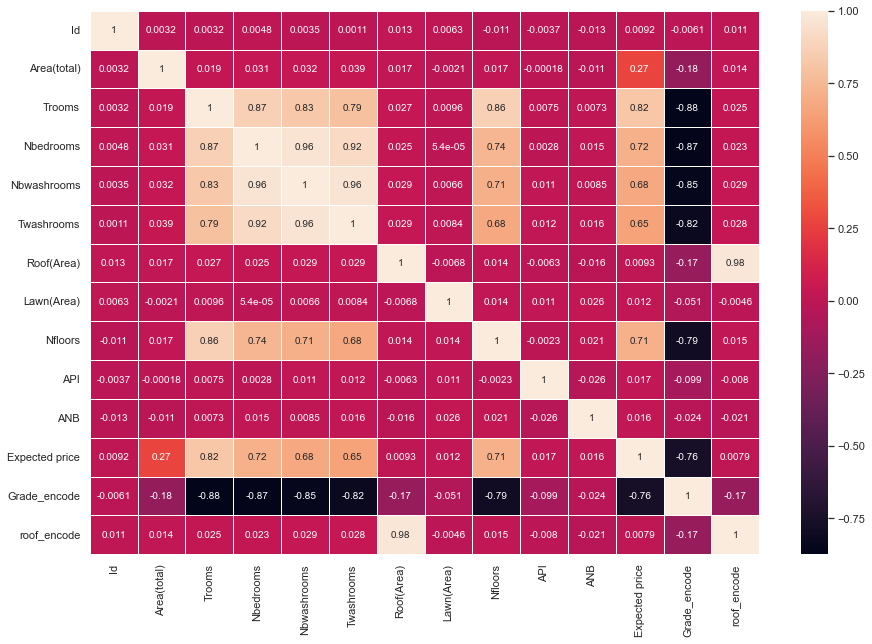

In [469]:
#correlation heatmap
fig, ax = plt.subplots(figsize=(15,10))         # Sample figsize in inches
sns.heatmap(house_df.corr(), annot = True, linewidths=.5, ax=ax)

#### Interpretation:
- Trooms,Nbedrooms,Nbwashrooms,Twashrooms,Nfloors and expected price are negative strongly correlated with Grade(Grade_encode) of houses.
-Drop rest of the featrures(columns)

#### ## Drop the columns

In [471]:
hdf = house_df.drop(['Id', 'Area(total)','roof', 'Roof(Area)','Lawn(Area)','Grade','API', 'ANB'],axis=1)

#### Now split the data in 70 and 30 ratio for training and testing respectively.

In [472]:
hdf.shape

(3000, 8)

In [473]:
# splitting dataframe using train_test_split() built in method
y = hdf['Grade_encode'] #TARGET VARIABLE
X = hdf.drop(['Grade_encode'],axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=20)
print("Shape of new dataframes - {} , {}".format(X_train.shape, X_test.shape))

Shape of new dataframes - (2400, 7) , (600, 7)


In [474]:
X

,Trooms,Nbedrooms,Nbwashrooms,Twashrooms,Nfloors,Expected price,roof_encode
0,6,5,4,6,2,3481,0
1,5,4,3,4,3,3510,1
2,7,5,4,5,5,3748,1
3,6,4,3,5,2,3134,1
4,7,4,4,5,3,3843,0
...,...,...,...,...,...,...,...
2995,9,6,5,7,5,4246,1
2996,9,8,7,8,7,3753,1
2997,7,4,3,5,5,3607,0
2998,9,7,7,8,7,4198,0


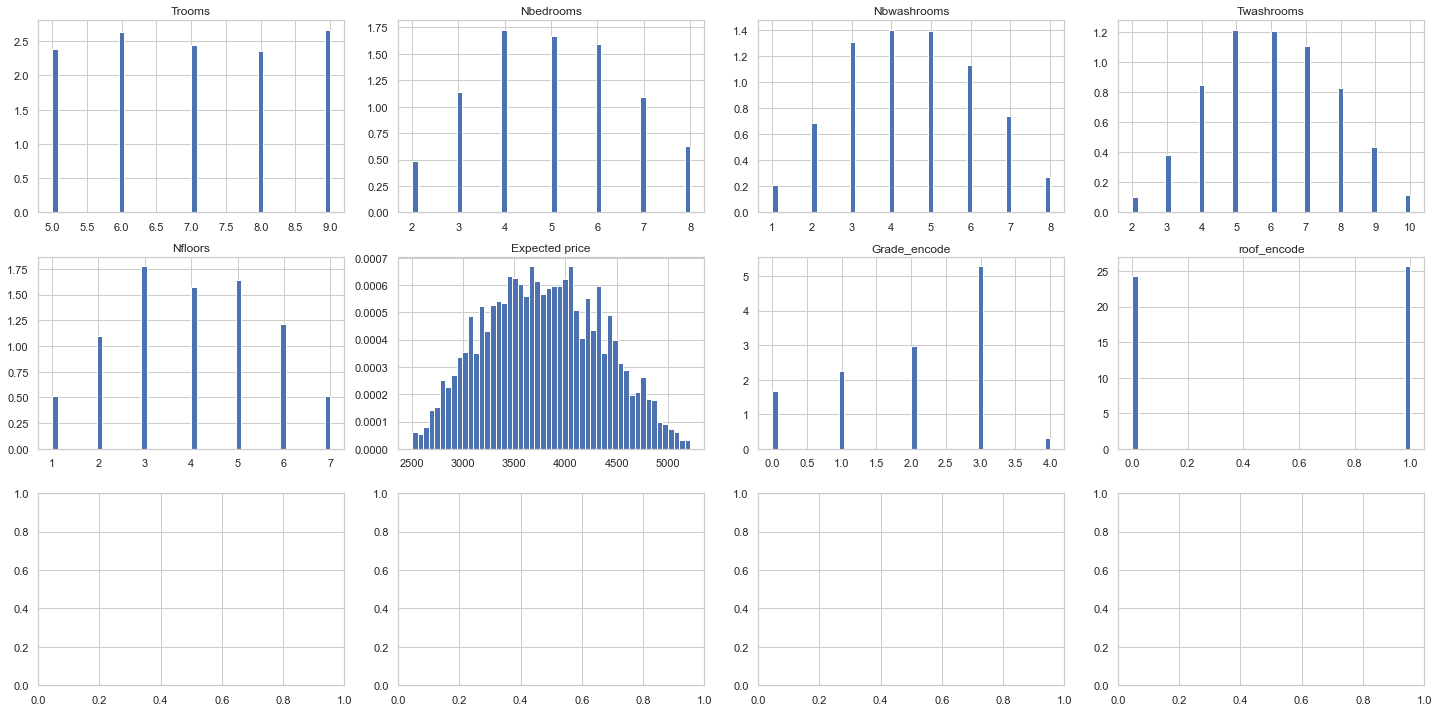

In [475]:
# Histogram of all numerical features

numerics = ['int32',  'float32', 'int64', 'float64']

new_house_df = hdf.select_dtypes(include=numerics)
numeric_cols=new_house_df.columns
num_cols=4
n_bins = 50

# compute number of rows for plot 
num_rows= int(len(numeric_cols)/num_cols)+1

# setting canvas for plotting
fig, axs = plt.subplots(num_rows, num_cols, tight_layout=True,figsize=(20,10))

# plotting the numerical columns
for col, ax in zip(numeric_cols,axs.flatten()[:len(numeric_cols)]):
    ax.hist(new_house_df[col],bins=n_bins,density=True)
    ax.set_title(col)

### ### It is supervised classification datatype as we have category in default in form of Grade A to E in form of Grade of house_encode [3 2 1 0 4]
- Lets do 3 modelling and check which one is fit

- Naive Bayes
- KNN
- Decision Tree

#### ## Naive Bayes

In [476]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB() # create a classifier
nb.fit(X_train,y_train) # fitting the data

GaussianNB()

In [477]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

y_pred = nb.predict(X_test) # store the prediction data
print("Accuracy Score:",accuracy_score(y_test,y_pred))  # calculate the accuracy
print("F1Score:",f1_score(y_test,y_pred,average='weighted'))   # calculate f1_score
print("Precision score:",precision_score(y_test,y_pred,average='weighted'))   # calculate precision_score
print("Recall score:",recall_score(y_test,y_pred,average='weighted'))   # calculate recall_score

Accuracy Score: 0.7383333333333333
F1Score: 0.7543931053553651
Precision score: 0.7905588894363273
Recall score: 0.7383333333333333


In [478]:
nb.score(X_train, y_train)

0.7633333333333333

In [479]:
nb.score(X_test,y_test)

0.7383333333333333

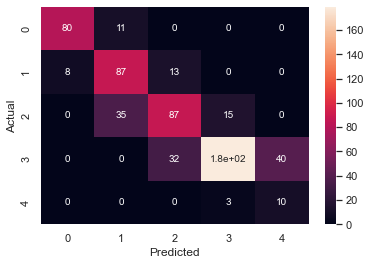

In [480]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
house_df_cm = pd.DataFrame(cm, columns=np.unique(y_test), index = np.unique(y_test) )
house_df_cm .index.name ="Actual"
house_df_cm .columns.name ="Predicted"
sns.heatmap(house_df_cm, annot=True)
plt.show()

#### KNN Model

In [481]:
from sklearn.neighbors import KNeighborsClassifier

In [482]:
knn = KNeighborsClassifier(n_neighbors=3, metric='manhattan')
knn.fit(X_train,y_train)

KNeighborsClassifier(metric='manhattan', n_neighbors=3)

In [483]:
knn.score(X_train, y_train)

0.83375

In [484]:
knn.score(X_test,y_test)

0.6916666666666667

In [485]:
from sklearn.metrics import accuracy_score
y_pred = knn.predict(X_test) # store the prediction data
print("Accuracy Score:",accuracy_score(y_test,y_pred))  # calculate the accuracy
print("F1Score:",f1_score(y_test,y_pred,average='weighted'))   # calculate f1_score
print("Precision score:",precision_score(y_test,y_pred,average='weighted'))   # calculate precision_score
print("Recall score:",recall_score(y_test,y_pred,average='weighted'))   # calculate recall_score

Accuracy Score: 0.6916666666666667
F1Score: 0.6841776866151866
Precision score: 0.6853795817518583
Recall score: 0.6916666666666667


In [486]:
from sklearn.metrics import accuracy_score
y_pred = knn.predict(X_test) # store the prediction data
print("Accuracy Score:",accuracy_score(y_test,y_pred))  # calculate the accuracy
print("F1Score:",f1_score(y_test,y_pred,average='weighted'))   # calculate f1_score
print("Precision score:",precision_score(y_test,y_pred,average='weighted'))   # calculate precision_score
print("Recall score:",recall_score(y_test,y_pred,average='weighted'))   # calculate recall_score

Accuracy Score: 0.6916666666666667
F1Score: 0.6841776866151866
Precision score: 0.6853795817518583
Recall score: 0.6916666666666667


In [487]:
y_pred = knn.predict(X_test)

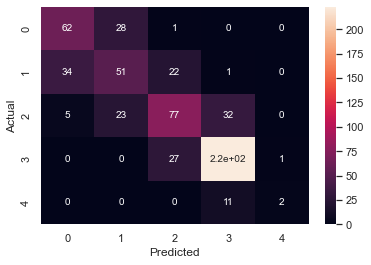

In [489]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
house_df_cm = pd.DataFrame(cm, columns=np.unique(y_test), index = np.unique(y_test) )
house_df_cm .index.name ="Actual"
house_df_cm .columns.name ="Predicted"
sns.heatmap(house_df_cm, annot=True)
plt.show()

#### Decision Tree

In [490]:
from sklearn.tree import DecisionTreeClassifier

In [491]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [492]:
dt.score(X_train, y_train)

0.9983333333333333

In [493]:
dt.score(X_test, y_test)

0.78

In [494]:
y_pred = dt.predict(X_test) # store the prediction data
print("Accuracy Score:",accuracy_score(y_test,y_pred))  # calculate the accuracy
print("F1Score:",f1_score(y_test,y_pred,average='weighted'))   # calculate f1_score
print("Precision score:",precision_score(y_test,y_pred,average='weighted'))   # calculate precision_score
print("Recall score:",recall_score(y_test,y_pred,average='weighted'))   # calculate recall_score

Accuracy Score: 0.78
F1Score: 0.7834169980617528
Precision score: 0.7880463565271624
Recall score: 0.78


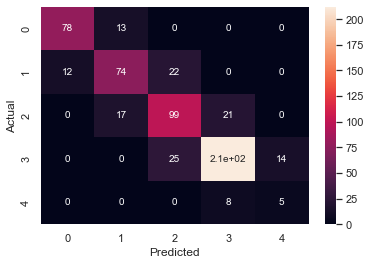

In [495]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
house_df_cm = pd.DataFrame(cm, columns=np.unique(y_test), index = np.unique(y_test) )
house_df_cm .index.name ="Actual"
house_df_cm .columns.name ="Predicted"
sns.heatmap(house_df_cm, annot=True)
plt.show()

#### Logistic Regression

In [496]:
# import the class
from sklearn.linear_model import LogisticRegression

# instantiate the model (using the default parameters)
logreg = LogisticRegression()

# fit the model with data
logreg.fit(X, y)

# predict the response values for the observations in X
logreg.predict(X)

array([3, 3, 1, ..., 1, 0, 2])

In [497]:
logreg.score(X_train, y_train)

0.5858333333333333

In [498]:
logreg.score(X_test, y_test)

0.6

In [499]:
from sklearn.metrics import accuracy_score
y_pred = logreg.predict(X_test) # store the prediction data
print("Accuracy Score:",accuracy_score(y_test,y_pred))  # calculate the accuracy
print("F1Score:",f1_score(y_test,y_pred,average='weighted'))   # calculate f1_score
print("Precision score:",precision_score(y_test,y_pred,average='weighted'))   # calculate precision_score
print("Recall score:",recall_score(y_test,y_pred,average='weighted'))   # calculate recall_score


Accuracy Score: 0.6
F1Score: 0.5831367448253941
Precision score: 0.5718324561403508
Recall score: 0.6


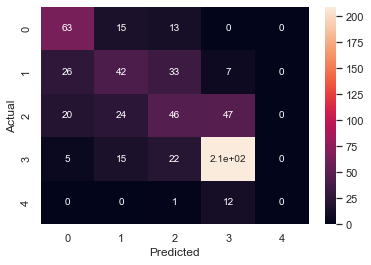

In [500]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
house_df_cm = pd.DataFrame(cm, columns=np.unique(y_test), index = np.unique(y_test) )
house_df_cm .index.name ="Actual"
house_df_cm .columns.name ="Predicted"
sns.heatmap(house_df_cm, annot=True)
plt.show()

## Interpretation : we can see that decision tree model compute the best model with accuracy of 0.78%